#**MINI DATATHON - SISTEMA DE RECOMENDACIÓN DE LIBROS**











![alt_text](https://drive.google.com/uc?export=view&id=1HaTy8qoZXqDWaWUBk2OJ5GTd7tNYDYKa)

# Business Case

> Trabajáis en el equipo de análitica avanzada de una editorial donde se quiere implementar un sistema de recomendación de libros personalizado para mejorar la experiencia de sus usuarios y aumentar las ventas.



**¿Seréis capaces de recomendar el próximo libro a nuestros lectores?**







# Dataset

Contamos con 5 datasets (en formato csv):

> *books.csv* : contiene la lista de todos los libros y sus metadatos

- *id*: incremental del dataset
- *book_id*: id de la edición más popular de cada libro
- *best_book_id*: id de la edición más popular para cada libro
- *books_count*: número de ediciones
- *work_id*: id del ejemplar
- *isbn* e *isbn13*: códigos del libro
- *authors* : autores del libro
- *original_publication_year* : año en el que se publicó el libro originalmente
- *original_title* : título original del libro
- *title*: título
- *rating_average* : rating medio
- *rating_count* : número de puntuaciones
- *language_code* : código del idioma del libro
- *work_text_reviews* : número de reviews que se han escrito
- *ratings_1* : número de puntuaciones 1
- *ratings_2* : número de puntuaciones 2
- *ratings_3* : número de puntuaciones 3
- *ratings_4* : número de puntuaciones 4
- *ratings_5* : número de puntuaciones 5
- *small_image_url* : url de la imagen de la portada del libro


> *ratings.csv* : contiene las puntuaciones de los lectores

- *book_id*
- *rating*: puntuación de los lectores


> *tags.csv* : contiene los géneros de los libros asignados por los lectores

- *tag_id*
- *tag* : nombre de la etiqueta

> *books_tags.csv* : relaciona las etiquetas y los libros

- *tag_id*
- *book_id*



> to_read.csv

- **user_id** : id del lector
- **book_id** : id del libro





Enlaces a los datasets:

**books_csv**  -> 'https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/books.csv'

**ratings_csv** -> 'https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/ratings.csv'

**tags_csv** -> 'https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/tags.csv'

**books_tags_csv** -> 'https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/book_tags.csv'

**to_read.csv** -> 'https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/to_read.csv'

# Carga

## 1.1 Cargamos las librerías

Intentaremos que tengamos todas las librerías que vamos a usar importadas al principio de nuestro notebook

In [ ]:
pip install fuzzywuzzy

In [ ]:
# Carga librerías (añadir a continuación el resto)
from IPython.display import Image, HTML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import plotly.graph_objs as go
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import fuzz

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## 1.2 Cargamos los dataset

In [ ]:
books = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/books.csv')
books.tail()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...
9999,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,9162,9700,364,117,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...


In [ ]:
ratings = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/ratings.csv')
ratings.tail()

,book_id,user_id,rating
981751,10000,48386,5
981752,10000,49007,4
981753,10000,49383,5
981754,10000,50124,5
981755,10000,51328,1


In [ ]:
tags = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/tags.csv')
tags.tail()

,tag_id,tag_name
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


In [ ]:
book_tags = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/book_tags.csv')
book_tags.tail()

,goodreads_book_id,tag_id,count
999907,33288638,21303,7
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7
999911,33288638,27939,7


In [ ]:
to_read = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/to_read.csv')

# 2. EDA

Función para visualizar la imagen de la portada del libro

## 2.1 Limpieza de los datos

**Recordatorio: los datos SIEMPRE ESTÁN MAL**

### 2.1.1 Duplicados

In [ ]:
# En la tabla de ratings debería existir un registro único por user_id y por book_id
print(ratings.shape)
ratings.drop_duplicates(subset =["user_id","book_id"],
                     keep = False, inplace = True)
print(ratings.shape)

(981756, 3)
(977269, 3)


Tenemos 4487 duplicados

In [ ]:
# En la tabla de libros deberíamos tener un registro único por título original
print(books.shape)
books.drop_duplicates(subset='original_title',keep=False,inplace=True)
print(books.shape)

(10000, 23)
(9151, 23)


Tenemos 849 duplicados

In [ ]:
# En la tabla de libros-etiquetas deberíamos tener un registro único por etiqueta e id del libro
print(book_tags.shape)
book_tags.drop_duplicates(subset=['tag_id','goodreads_book_id'],keep=False,inplace=True)
print(book_tags.shape)

(999912, 3)
(999896, 3)


Tenemos 16 duplicados

In [ ]:
# En la tabla de etiquetas deberíamos tener un registro único por etiqueta
print(tags.shape)
tags.drop_duplicates(subset='tag_id',keep=False,inplace=True)
print(tags.shape)

(34252, 2)
(34252, 2)


No tenemos duplicados

### 2.1.2 Nulos

In [ ]:
# Número de nulos en la tabla de ratings
print(ratings.isnull().sum())

book_id    0
user_id    0
rating     0
dtype: int64


No tenemos nulos

In [ ]:
# Número de nulos en la tabla de libros
print(books.isnull().sum())

id                             0
book_id                        0
best_book_id                   0
work_id                        0
books_count                    0
isbn                         538
isbn13                       440
authors                        0
original_publication_year      6
original_title                 0
title                          0
language_code                986
average_rating                 0
ratings_count                  0
work_ratings_count             0
work_text_reviews_count        0
ratings_1                      0
ratings_2                      0
ratings_3                      0
ratings_4                      0
ratings_5                      0
image_url                      0
small_image_url                0
dtype: int64


Tenemos nulos en las columnas de isbn e isbn13 (son códigos que no usaremos así que no vamos a imputar los nulos) y también en el código de lenguaje (veremos posteriormente si usamos esa variable para imputarla)

In [ ]:
# Número de nulos en la tabla de libros y etiquetas
print(book_tags.isnull().sum())

goodreads_book_id    0
tag_id               0
count                0
dtype: int64


No tenemos nulos

In [ ]:
# Número de nulos en la tabla de etiquetas
print(tags.isnull().sum())

tag_id      0
tag_name    0
dtype: int64


No tenemos nulos

También modificamos el nombre de *J.K. Rowling-Mary GrandPré* por J.K. Rowling

In [ ]:
#books.replace(to_replace='J.K. Rowling, Mary GrandPré', value = 'J.K. Rowling', inplace=True)

## 2.2 Visualizaciones

Función para mostrar la portada del libro usando la url del dataset de books

In [ ]:
def path_to_image_html(path):
    '''
     Esta función sirve para convertir la url de la imagen al formato
     '<img src="'+ path + '"/>'
    '''

    return '<img src="'+ path + '"/>'

Ideas visualizaciones:

- TOP 10 libros con mayor rating (con la iamgen de su portada)
- TOP 10 libros más populares
- Distribución de los ratings (ratings más comunes)
- Autores con mayor número de ratings
- Word cloud para los géneros

Algunos ejemplos de preguntas:
- ¿Los lectores prefieren títulos largos o cortos?
- ¿Existe relación entre el número de ediciones y la puntuación?
- ¿Cuáles son los libros top que muchos lectores quieren leer?



**.... es fundamental que entendamos bien nuestros datos antes de modelizarlos**

### 2.2.1 Top 10 libros con mayor rating

Para representar los 10 libros con mayor rating tenemos que ordenar los libros por el campo *average_rating* (media de los ratings) de forma descendente y quedarnos con los 10 primeros.

Una vez los tenemos nos quedamos con los títulos y el campo de *small_image_url* que es el que nos mostrará la imagen de la portada

In [ ]:
top_rated = books.sort_values('average_rating', ascending=False)
top10 = top_rated.head(10)
cols = ['title','small_image_url']
display_object = (top10[cols])
display_object.set_index('title', inplace=True)

In [ ]:
HTML(display_object.to_html(escape=False ,formatters=dict(small_image_url=path_to_image_html),justify='center'))

,small_image_url
title,
The Complete Calvin and Hobbes,
"Words of Radiance (The Stormlight Archive, #2)",
Mark of the Lion Trilogy,
It's a Magical World: A Calvin and Hobbes Collection,
There's Treasure Everywhere: A Calvin and Hobbes Collection,
"Harry Potter Boxset (Harry Potter, #1-7)",
"Harry Potter Collection (Harry Potter, #1-6)",
The Indispensable Calvin and Hobbes,
The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury,


### 2.2.2 Top 10 libros más populares

Ordenamos los libros por el número de puntuaciones (es el único campo que nos indica el número de lectores que hay) y nos quedamos con los 10 que tienen más ratings.

Una vez los tenemos nos quedamos con los títulos y el campo de *small_image_url* que es el que nos mostrará la imagen de la portada

In [ ]:
pop10 = books.sort_values(by='ratings_count', ascending=False)
cols = ['title','small_image_url']
pop10 = pop10.head(10)

display_object = (pop10[cols])
display_object = display_object.set_index('title')

In [ ]:
HTML(display_object.to_html(escape=False ,formatters=dict(small_image_url=path_to_image_html),justify='center'))

,small_image_url
title,
"The Hunger Games (The Hunger Games, #1)",
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
To Kill a Mockingbird,
The Great Gatsby,
The Fault in Our Stars,
The Hobbit,
The Catcher in the Rye,
Pride and Prejudice,
"Angels & Demons (Robert Langdon, #1)",


### 2.2.3 Distribución de los ratings

Por un lado podemos ver cómo se distribuyen los ratings medios de la tabla de libros

<ipython-input-22-4eb07cee2de2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(books['average_rating'], kde=True, color='r')


<Axes: xlabel='average_rating', ylabel='Density'>

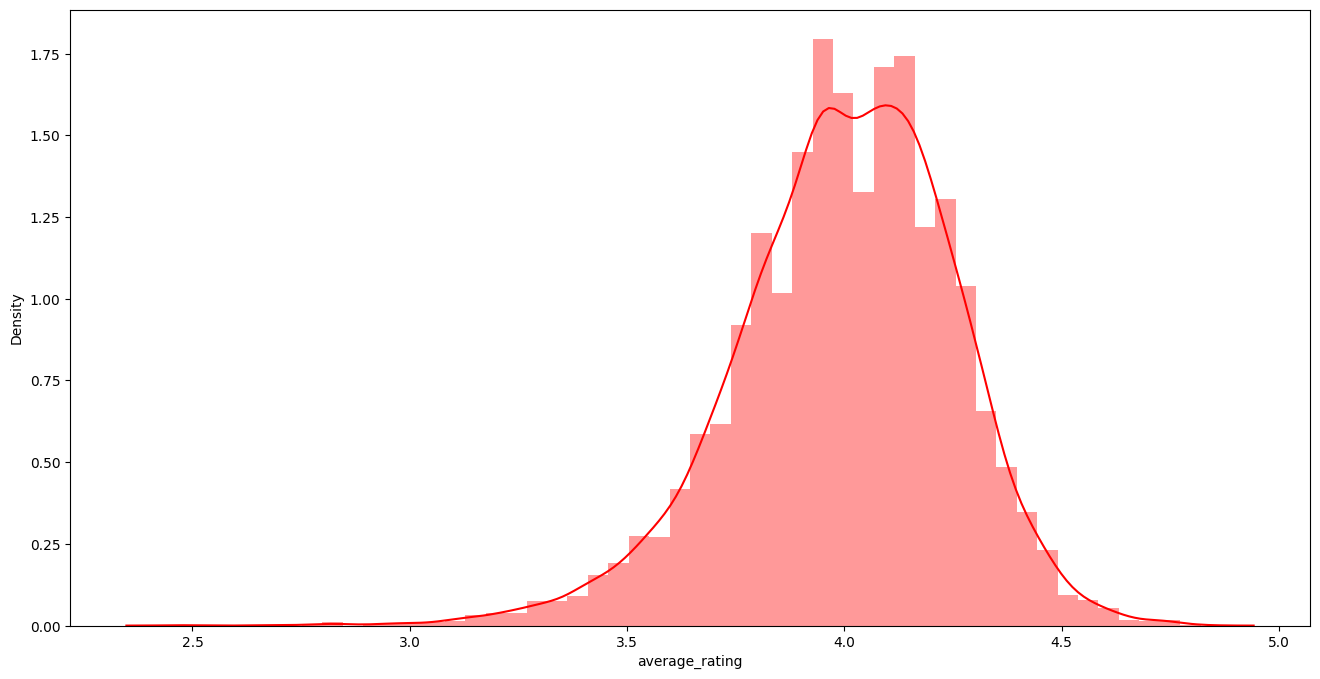

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(books['average_rating'], kde=True, color='r')

Ahora vamos a ver en la tabla de ratings el volumen de puntuaciones que tenemos por libro

In [ ]:
no_of_ratings_per_book = ratings.groupby('book_id').count()

In [ ]:
no_of_ratings_per_book

,user_id,rating
book_id,,
1,100,100
2,100,100
3,100,100
4,100,100
5,100,100
...,...,...
9996,96,96
9997,89,89
9998,95,95


<ipython-input-25-64478ae9b5f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_of_ratings_per_book['rating'], color='g')


<Axes: xlabel='rating', ylabel='Density'>

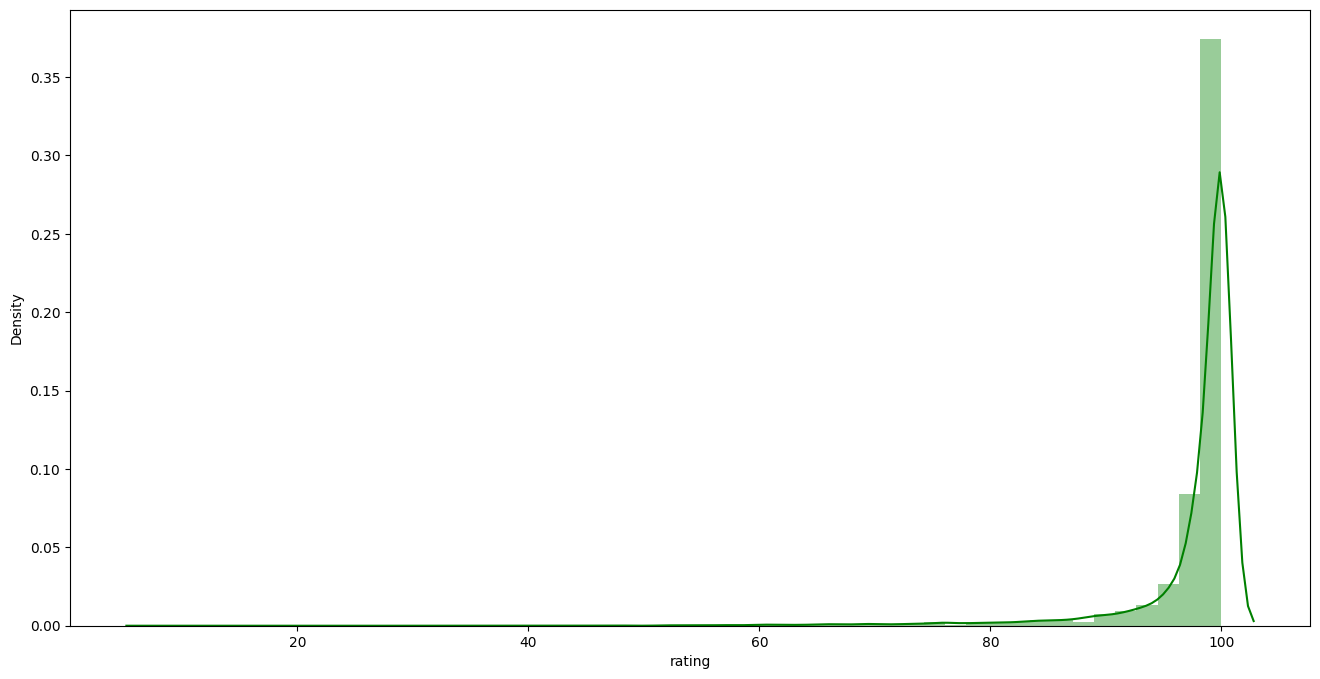

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(no_of_ratings_per_book['rating'], color='g')

Vemos que la mayoría de los libros tienen más de 80 ratings (es un buen volumen)

### 2.2.4 Top autores con mayor rating


In [ ]:
cols = ['authors', 'average_rating']
top_authors = top_rated[cols]
top_authors = top_authors.head(20)

In [ ]:
fig = px.bar(top_authors, x='authors', y='average_rating', color ='average_rating')
fig.show()

### 2.2.5 Top 10 autores con más libros

<ipython-input-28-14d6a0334818>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




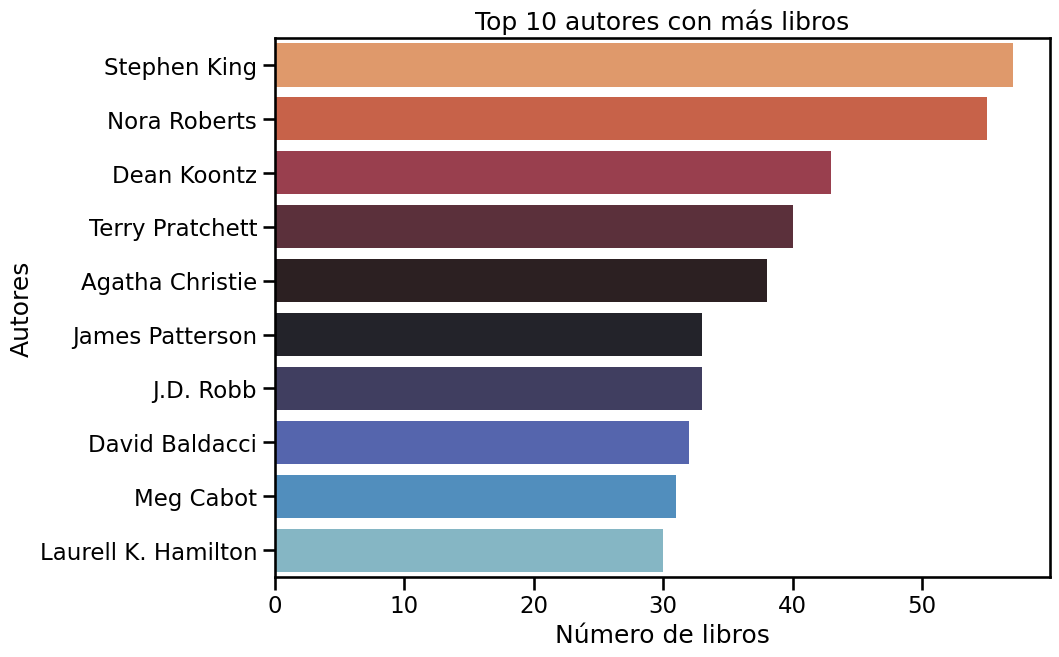

In [ ]:
sns.set_context('talk')
most_books = books.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10)
plt.figure(figsize=(10,7))
sns.barplot(x='title', y='authors', data=most_books, palette='icefire_r')
plt.xlabel('Número de libros')
plt.ylabel('Autores')
plt.title('Top 10 autores con más libros')
plt.show()

### 2.2.6 ¿Prefieren los lectores títulos largos o cortos?

In [ ]:
books['length-title']=books['original_title'].str.len()

<Axes: xlabel='length-title', ylabel='average_rating'>

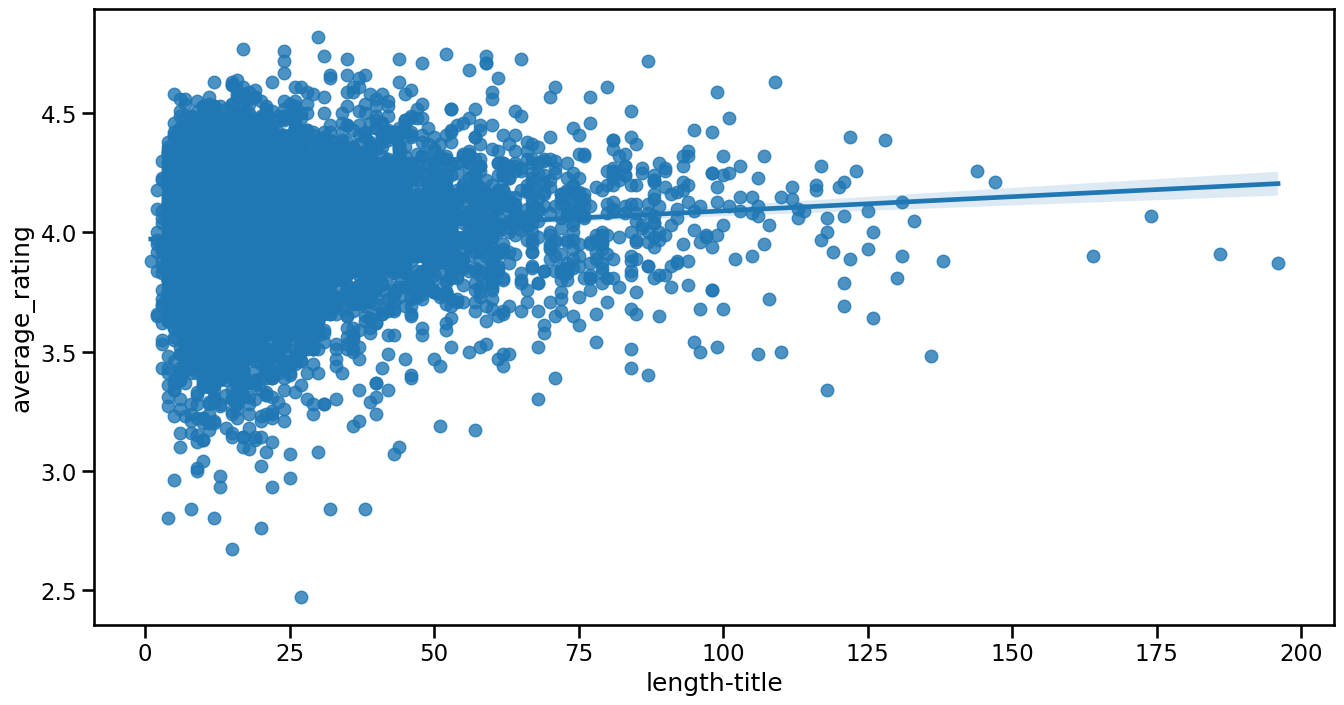

In [ ]:
plt.figure(figsize=(16,8))
sns.regplot(x=books['length-title'], y=books['average_rating'])

### 2.2.7 Word Cloud

In [ ]:
# Unimos los tags
joint_tags=pd.merge(tags,book_tags,left_on='tag_id',right_on='tag_id',how='inner')

In [ ]:
tags_agg = joint_tags.groupby('tag_name').count().sort_values('count', ascending = False)

In [ ]:
genres=["Art", "Biography", "Business", "Chick Lit", "Children's", "Christian", "Classics", "Comics", "Contemporary", "Cookbooks", "Crime", "Ebooks", "Fantasy", "Fiction", "Gay and Lesbian", "Graphic Novels", "Historical Fiction", "History", "Horror", "Humor and Comedy", "Manga", "Memoir", "Music", "Mystery", "Nonfiction", "Paranormal", "Philosophy", "Poetry", "Psychology", "Religion", "Romance", "Science", "Science Fiction", "Self Help", "Suspense", "Spirituality", "Sports", "Thriller", "Travel", "Young Adult"]
for i in range(len(genres)):
    genres[i]=genres[i].lower()

In [ ]:
new_tags=tags_agg[tags_agg.index.isin(genres)]

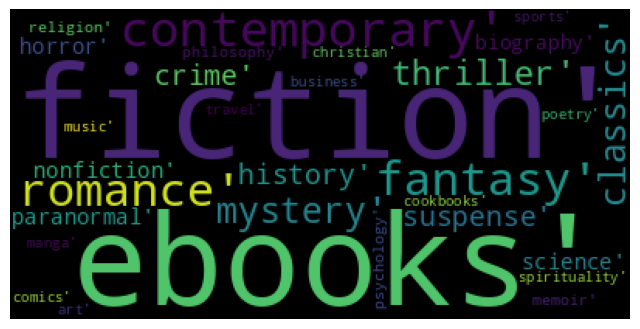

In [ ]:
from wordcloud import WordCloud, STOPWORDS
text = new_tags.index.values

wordcloud = WordCloud().generate(str(text))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 2.2.8 ¿Existe relación entre el número de ediciones y la valoración?

In [ ]:
fig = px.line(books, y="books_count", x="average_rating", title='Número de ediciones VS Valoración media')
fig.show()

### 2.2.9 Top libros que los usuarios quieren leer

In [ ]:
to_r= books.merge(to_read, left_on='book_id', right_on='book_id', how='inner')

In [ ]:
to_r=to_r.groupby('original_title').count()

In [ ]:
to_r=to_r.sort_values(by='id', ascending=False)
to_r20=to_r.head(20)

In [ ]:
fig = px.bar(to_r20, x=to_r20.index, y='id', color ='id')
fig.show()

# Modelización


**Recordatorio teoría**

Un motor de recomendación es una herramienta que filtra datos utilizando diferentes algoritmos para recomendar los elementos más relevantes a los usuarios.

Hay dos tipos principales de sistemas de recomendación:



> **Basado en contenido**

Este enfoque analiza el contenido disponible y busca similitudes entre los elementos para luego recomendar aquellos que tienen una alta similitud.

En otras palabras, se centra en las características y atributos de los elementos mismos para hacer recomendaciones. Por ejemplo, si a un usuario le gustan ciertas novelas de misterio, un sistema basado en contenido podría recomendarle otras novelas de misterio similares en características.



> **Colaborativo**

Este enfoque analiza la información sobre usuarios que tienen preferencias similares y recomienda elementos que esos usuarios similares han disfrutado. En lugar de centrarse en las características de los elementos, se centra en el comportamiento de los usuarios. Si dos usuarios tienen gustos similares de libros, un sistema colaborativo podría recomendar libros que uno de ellos ha disfrutado previamente y el otro aún no ha leído.






## 3.1 Content-based filtering


![alt_text](https://drive.google.com/uc?export=view&id=1TPGY3NXSbt4ghzBzWj8iSCKkLQpbUMiJ)


Vamos a basarnos en las columnas *title* , *authors*, *average_rating* para hacer el sistema de recomendación

In [ ]:
# Seleccionamos las columnas que nos interesan
books[['title','authors','average_rating']]

,title,authors,average_rating
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",4.44
3,To Kill a Mockingbird,Harper Lee,4.25
4,The Great Gatsby,F. Scott Fitzgerald,3.89
5,The Fault in Our Stars,John Green,4.26
...,...,...,...
9995,"Bayou Moon (The Edge, #2)",Ilona Andrews,4.09
9996,"Means of Ascent (The Years of Lyndon Johnson, #2)",Robert A. Caro,4.25
9997,The Mauritius Command,Patrick O'Brian,4.35
9998,Cinderella Ate My Daughter: Dispatches from th...,Peggy Orenstein,3.65


Normalizamos las columnas (todo en minúsculas y sin espacios). Para ello vamos a utilizar una función que toma como parámetro la columna y la convierte a minúsculas y elimina los espacios

In [ ]:
# función que elimina los espacios
def clean_data(x):
  return str.lower(x.replace(' ', ''))

Convertimos solo las columnas que vamos a usar para el sistema de recomendación

In [ ]:
# Seleccionamos las columnas que nos interesan
features=['original_title','authors','average_rating']
books_sr = books[features]

In [ ]:
# Convertimos todas las variables a string
books_sr[features] = books_sr[features].astype(str)

<ipython-input-44-d076938bada8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Aplicamos la función en las dos columnas
for feature in features:
  books_sr[feature] = books_sr[feature].apply(clean_data)

books_sr.head(2)

<ipython-input-45-4c23d02062ed>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,original_title,authors,average_rating
0,thehungergames,suzannecollins,4.34
1,harrypotterandthephilosopher'sstone,"j.k.rowling,marygrandpré",4.44


Creamos un campo nuevo que incluya el título, los autores y el rating en un mismo campo. Si tuviésemos un campo que fuese la descripción del argumento del libro sería una buena opción para usar. Como no es nuestro caso, construimos un nuevo campo que incluya esos 3 campos

In [ ]:
def create_soup(x):
    return x['original_title']+ ' ' + x['authors'] + ' ' + x['average_rating']

In [ ]:
# Creamos un nuevo campo que concatene las 3 columnas
books_sr['soup'] = books_sr.apply(create_soup, axis=1)

<ipython-input-47-efbe0f5a2677>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
books_sr['soup']

0                      thehungergames suzannecollins 4.34
1       harrypotterandthephilosopher'sstone j.k.rowlin...
3                       tokillamockingbird harperlee 4.25
4                   thegreatgatsby f.scottfitzgerald 3.89
5                       thefaultinourstars johngreen 4.26
                              ...                        
9995                          bayoumoon ilonaandrews 4.09
9996                      meansofascent roberta.caro 4.25
9997              themauritiuscommand patricko'brian 4.35
9998    cinderellaatemydaughter:dispatchesfromthefront...
9999                      thefirstworldwar johnkeegan 4.0
Name: soup, Length: 9151, dtype: object

Para calcular la similitud entre las distintas observaciones (libros en nuestro caso) hay que realizar los siguientes pasos:

1. Instanciamos el CountVectorizer donde se eliminan las stopwords y se devuelve la frecuencia de los términos que aparecen por cada fila de nuestra matriz.

2. Con la función cosine_similarity se calcula la similitud entre cosenos. El resultado es una matriz cuadrada en la que cada elemento representa la similitud de cosenos entre el documento i y el documento j del conjunto de datos original. Esto proporciona una medida que indica cómo de similares son los documentos entre sí en función de su contenido (en nuestro caso su contenido textual es el campo "soup")

In [ ]:
# Instanciamos el CountVectorizer y entrenamos
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(books_sr['soup'])

In [ ]:
count_matrix

<9151x17302 sparse matrix of type '<class 'numpy.int64'>'
	with 33809 stored elements in Compressed Sparse Row format>

In [ ]:
# Instanciamos el CountVectorizer y entrenamos
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(books_sr['soup'])


# Función cosine similarity
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
# Nos quedamos con el título como si fuese el índice y como valor el índice del dataset
books_sr = books_sr.reset_index()
indices = pd.Series(books_sr.index, index= books_sr['original_title'])

Vamos a definir una función que tenga como parámetros de entrada el título del libro y como función la función cosine similarity y que nos devuelva los 10 libros más similares al que hemos pasado por parámetro

In [ ]:
# Función recomendaciones
def get_recommendations_new(title, cosine_sim=cosine_sim2):

    # Cogemos el título del libro y lo pasamos a minúsculas y quitamos los espacios para que aparezca igual que en el dataframe que hemos creado
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Sacamos los scores de la matriz de similitud para ese libro en concreto
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Ordenamos los scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Sacamos los 10 con mayor score
    sim_scores = sim_scores[1:11]

    # Sacamos los índices de los libros de esos scores
    books_indices = [i[0] for i in sim_scores]

    # Devolvemos los libros
    return list(books['original_title'].iloc[books_indices])

Sacamos un gráfico de plotly con el top 10 libros más similares

In [ ]:
l=get_recommendations_new('The Hobbit', cosine_sim2)
fig = go.Figure(data=[go.Table(header=dict(values=l,fill_color='orange'))
                     ])
fig.show()

In [ ]:
l=get_recommendations_new('Harry Potter and The Chamber of Secrets', cosine_sim2)
fig = go.Figure(data=[go.Table(header=dict(values=l,fill_color='orange'))
                     ])
fig.show()

## 3.2 Collaborative filtering

![alt_text](https://drive.google.com/uc?export=view&id=1WI9t3DCKtY4zrjLbpJUiv5zOWe62m_FH)








Vamos a usar primero el dataframe de ratings (donde aparecen las reviews a los distintos libros)

In [ ]:
ratings

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
...,...,...,...
981751,10000,48386,5
981752,10000,49007,4
981753,10000,49383,5
981754,10000,50124,5


In [ ]:
# Construimos una pivot table para ver cuántos los rating por usuario y libro (rellenamos los valores faltantes con un 0)
df_book_features = ratings.pivot(index='book_id',columns='user_id',values='rating').fillna(0)

# Vamos a convertir la pivot table en una matriz dispersa ya que al tener la mayoría de valores 0
# se ahorra memoria y se aceleran los cálculos matriciales

mat_book_features = csr_matrix(df_book_features.values)

In [ ]:
# ¿Cuántos usuarios únicos tenemos en el dataset de ratings y cuántos libros únicos?
num_users = len(ratings.user_id.unique())
num_items = len(ratings.book_id.unique())
print('Hay {} usuarios únicos y {} libros únicos en este dataset'.format(num_users, num_items))

Hay 53380 usuarios únicos y 10000 libros únicos en este dataset


In [ ]:
# ¿Cuántos ratings hay por puntuación?
df_ratings_cnt_tmp = pd.DataFrame(ratings.groupby('rating').size(), columns=['count'])
df_ratings_cnt_tmp.head(10)

,count
rating,
1,19485
2,63010
3,247698
4,355878
5,291198


In [ ]:
df_books_cnt = pd.DataFrame(ratings.groupby('book_id').size(), columns=['count']).sort_values('count', ascending=False)
df_books_cnt.head()

,count
book_id,
1,100
4842,100
4870,100
4869,100
4868,100


Calculamos el número máximo de calificaciones que podríamos tener (máximo número de usuarios por máximo número de libros)

El número de calificaciones 0 (no hay calificación) es el total posible menos el número de puntuaciones en el dataset.

Sacamos en un dataset el volumen de ratings por puntuación (donde se observa que la mayoría no tienen calificación)

In [ ]:
total_cnt = num_users * num_items
rating_zero_cnt = total_cnt - ratings.shape[0]

df_ratings_cnt = df_ratings_cnt_tmp.append(
    pd.DataFrame({'count': rating_zero_cnt}, index=[0.0]),
    verify_integrity=True,
).sort_index()
df_ratings_cnt

<ipython-input-61-a266d560bba9>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,count
0.0,532822731
1.0,19485
2.0,63010
3.0,247698
4.0,355878
5.0,291198


Nos vamos a quedar solo con los libros que al menos tienen 60 puntuaciones para el sistema de recomendación

In [ ]:
# Establecemos un threshold de 60
popularity_thres = 60
popular_movies = list(set(df_books_cnt[df_books_cnt['count'] >= popularity_thres].index))
df_ratings_drop = ratings[ratings.book_id.isin(popular_movies)]
print('El tamaño del dataset de ratings original: ', ratings.shape)
print('El tamaño del dataset de ratings después de eliminar los libros poco populares: ', df_ratings_drop.shape)

El tamaño del dataset de ratings original:  (977269, 3)
El tamaño del dataset de ratings después de eliminar los libros poco populares:  (975605, 3)


In [ ]:
# Sacamos el número de ratings por usuario
df_users_cnt = pd.DataFrame(df_ratings_drop.groupby('user_id').size(), columns=['count']).sort_values('count', ascending = False)
df_users_cnt.head()

,count
user_id,
30944,200
12874,200
12381,199
52036,199
28158,199


Nos quedamos con aquellos usuarios que al menos han puntuado 50 veces

In [ ]:
ratings_thres = 50
active_users = list(set(df_users_cnt[df_users_cnt['count'] >= ratings_thres].index))
df_ratings_drop_users = df_ratings_drop[df_ratings_drop.user_id.isin(active_users)]
print('Tamaño del dataset original: ', ratings.shape)
print('Tamaño del dataset después de eliminar los libros poco populares y los usuarios inactivos (apenas puntuan): ', df_ratings_drop_users.shape)

Tamaño del dataset original:  (977269, 3)
Tamaño del dataset después de eliminar los libros poco populares y los usuarios inactivos (apenas puntuan):  (417687, 3)


In [ ]:
# Generamos de nuevo la pivot table
book_user_mat = df_ratings_drop_users.pivot(index='book_id', columns='user_id', values='rating').fillna(0)
book_user_mat

user_id,7,35,41,75,119,143,145,153,158,173,...,53245,53279,53281,53292,53293,53318,53352,53366,53373,53381
book_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Y la matriz dispersa
book_user_mat_sparse = csr_matrix(book_user_mat.values)

Definimos una función para relacionar el nombre del libro introducido como parámetro con los libros con nombres más parecidos que están en el dataset de libros. la función espera por parámetros el mapper (índices de los libros), fav_book (nombre del libro del que quieres buscar recomendación)

In [ ]:
def fuzzy_matching(mapper, fav_book, verbose=True):

    match_tuple = []
    # Obtener el match
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_book.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio))

    # Ordenar para obtener aquellos nombres más similares
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('No se ha encontrado ningún match')
        return
    if verbose:
        print('Se han encontrado matches en el set de datos {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]

In [ ]:
usecols=['book_id', 'original_title']
books_col=books[usecols]

In [ ]:
books_col

,book_id,original_title
0,2767052,The Hunger Games
1,3,Harry Potter and the Philosopher's Stone
3,2657,To Kill a Mockingbird
4,4671,The Great Gatsby
5,11870085,The Fault in Our Stars
...,...,...
9995,7130616,Bayou Moon
9996,208324,Means of Ascent
9997,77431,The Mauritius Command
9998,8565083,Cinderella Ate My Daughter: Dispatches from th...


In [ ]:
indices

original_title
thehungergames                                                                      0
harrypotterandthephilosopher'sstone                                                 1
tokillamockingbird                                                                  2
thegreatgatsby                                                                      3
thefaultinourstars                                                                  4
                                                                                 ... 
bayoumoon                                                                        9146
meansofascent                                                                    9147
themauritiuscommand                                                              9148
cinderellaatemydaughter:dispatchesfromthefrontlinesofthenewgirlie-girlculture    9149
thefirstworldwar                                                                 9150
Length: 9151, dtype: int64

In [ ]:
# Ejemplo
# le pasamos el índice asociado al nombre de cada libro
my_favorite = 'To kill a mockingbird'
indices = pd.Series(books.index, index=books['original_title'])

In [ ]:
idx = fuzzy_matching(indices, my_favorite)

Se han encontrado matches en el set de datos ['To Kill a Mockingbird', 'Mockingbird', 'Stolen Songbird']



In [ ]:
# Inicializamos el modelo
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [ ]:
def make_recommendation(model_knn, data, mapper, fav_book, n_recommendations):

    # Entrenamos el KNN
    model_knn.fit(data)
    # Sacamos el índice del libro con el nombre más parecido al que habéis pasado por parámetros
    print('Tu libro input es:', fav_book)
    # Llámamos a la función para sacar el índice del libro
    idx = fuzzy_matching(mapper, fav_book, verbose=True)

    print('El sistema de recomendación ha empezado a hacer la inferencia')
    print('......\n')

    # Sacamos las distancias y los índices donde el libro input ha sido la salida de la función anterior y n_neighbors el número de puntos (vecinos) que evaluamos
    # Este va a ser siempre 1 más que el número de recomendaciones (si es impar evitamos problemas de empates)
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)

    # Ordenamos los libros por distancia  (los más similares irán primero)
    raw_recommends = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # Construimos un diccionario para mapear los índices a los nombres de los libros
    reverse_mapper = {v: k for k, v in mapper.items()}
    # Hacemos print de las recomendaciones y de las distancias
    print('Recomendaciones para {}:'.format(fav_book))
    rec=[]
    for i, (idx, dist) in enumerate(raw_recommends):
        if idx not in reverse_mapper.keys():
            continue
        print('{0}: {1}, con una distancia de {2}'.format(i+1, reverse_mapper[idx], dist))


In [ ]:
# Ejemplo 1
make_recommendation(
    model_knn=model_knn,
    data=book_user_mat_sparse,
    fav_book='Harry Potter  Chamber of Secrets',
    mapper=indices,
    n_recommendations=10)

Tu libro input es: Harry Potter  Chamber of Secrets
Se han encontrado matches en el set de datos ['Harry Potter and the Chamber of Secrets', 'Harry Potter and the Goblet of Fire', 'Harry Potter and the Chamber of Secrets: Sheet Music for Flute with C.D', 'Harry Potter Boxed Set Books 1-4', 'Complete Harry Potter Boxed Set']

El sistema de recomendación ha empezado a hacer la inferencia
......

Recomendaciones para Harry Potter  Chamber of Secrets:
1: The Return of the King, con una distancia de 0.5137453857083071
2: Mockingjay, con una distancia de 0.484811069871498
3: The Da Vinci Code, con una distancia de 0.48437188831920774
4: Catching Fire, con una distancia de 0.46678667832629206
5: Harry Potter and the Philosopher's Stone, con una distancia de 0.4454417431428892
6: Harry Potter and the Deathly Hallows, con una distancia de 0.2774345523014743
7: Harry Potter and the Half-Blood Prince, con una distancia de 0.21458444953407796
8: Harry Potter and the Order of the Phoenix, con una d

In [ ]:
# Ejemplo 2
make_recommendation(
    model_knn=model_knn,
    data=book_user_mat_sparse,
    fav_book='To kill a mockingbird',
    mapper=indices,
    n_recommendations=10)

Tu libro input es: To kill a mockingbird
Se han encontrado matches en el set de datos ['To Kill a Mockingbird', 'Mockingbird', 'Stolen Songbird']

El sistema de recomendación ha empezado a hacer la inferencia
......

Recomendaciones para To kill a mockingbird:
1: Lord of the Flies , con una distancia de 0.45598309432313877
2: Little Women, con una distancia de 0.4526896099993938
3: Nineteen Eighty-Four, con una distancia de 0.4396460119625992
4: Memoirs of a Geisha, con una distancia de 0.43283216907946764
5: Animal Farm: A Fairy Story, con una distancia de 0.4252435075403517
6: Pride and Prejudice, con una distancia de 0.4251608152166305
7: Of Mice and Men , con una distancia de 0.4204446294803902
8: Harry Potter and the Philosopher's Stone, con una distancia de 0.3892592020883805
9: The Catcher in the Rye, con una distancia de 0.3699905318987523
10: The Great Gatsby, con una distancia de 0.2966652339964868
